## 2-canyon run, Astoria base, higher N

### General description
Repeat of experiment July 4th. No PIV. 2 runs. Using more water (+2L) in buckets to avoid having to tilt bucket 2 at the end of filling.Second experiment of planned list. 

### Notes:
Took base measurements of ANK readings throughout the spin ups.

### Stratification
New volume is 18 L  per bucket vs. 16 L from before.

900 g salt bucket 1 (Started filling at 11:45, ended 13:20)

$\rho_{b1}=1.02926$ g cm$^{-3}$ at 20.022  deg C at 12:00 

$\rho_{b2}=0.99826 $ g cm$^{-3}$ at 20.022  deg C 

### Rotation and forcing

|$f$| rad s$^{-1}$|$\Delta t$ /s|Description|
|:-:|:-:|:-:|:-:|
|$f_0$|0.50| - |background, spin up  |
|$f_1$|0.54|21|ramp up|
|$f_2$|0.58|50|avoid spin down|
|$f_2$ to $f_0$|-|15 min|ramp down to background $f$|

### Conduino

#### Experiments
Started conduino, then waited 15 s to start table profile for upwelling runs. These time I took 10000 samples instead of the usual 3000.

* run01 - experiment01.mat (15:20) - 05_experiment1.mat
* run02 - experiment02.mat (16:35) - 10_experiment2.mat

#### Base measurement ANK probes
10000 samples

|time|file|
|:-:|:-:|
|13:35|00_base.mat|
|14:08|01_base2.mat|
|14:38|02_base3.mat|
|14:52|03_base4.mat|
|15:45|06_base5.mat|
|16:09|07_base6.mat|
|16:30|09_base7.mat|

### Density samples

#### run01 (13:45)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|:----:|:---:|:---:|
|1.01075|20.020| surface|
|1.018385|20.001|2.9$^*$ |
|1.02793|20.007|9.5$^*$ |

#### run02 (15:05)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|:----:|:---:|:---:|
|1.01113|20.012| surface|
|1.01873|20.025|2.9$^*$|
|1.02768|20.030|9.5$^*$|

$^*$I forgot to measure the depths at sb and bottom, these are the usual ones.

### Profiler
Profile readings were noisy the first time. Had to do each profiles twice. On the first profile measurement I pushed the aluminum arm down deeper after the 2nd profile, so ignore the first 2 cycles.

*  15:00  - 04_profile1.mat
*  16:15 - 08_profile2.mat

In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

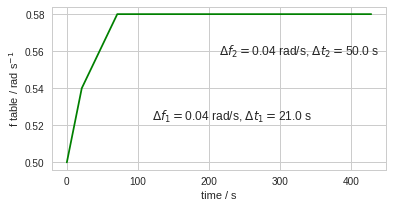

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.54 # rad/s
f2 = 0.58 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../experiments/exp_20jul19/05_experiment1.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

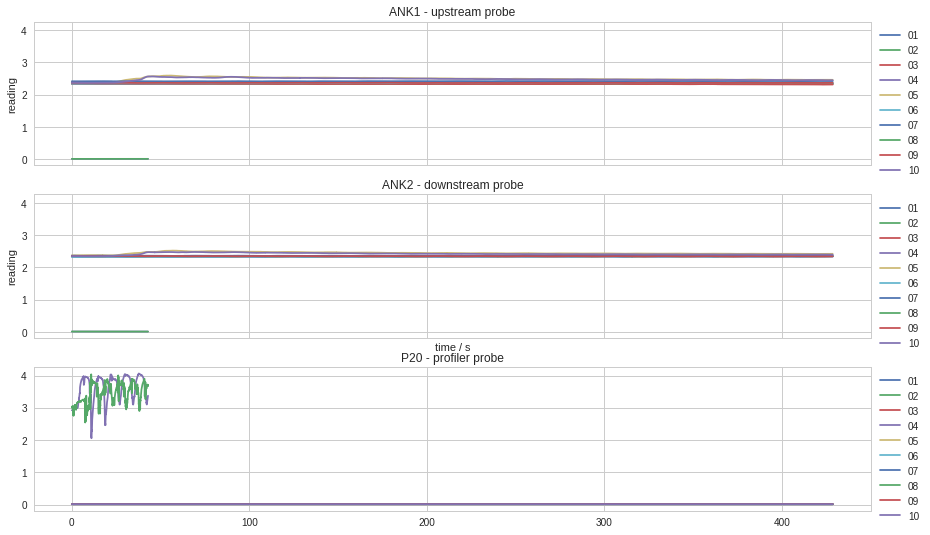

In [6]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ '01','02','03','04','05','06','07','08','09','10']

filepaths = ['../experiments/exp_20jul19/01_base2.mat',
             '../experiments/exp_20jul19/02_base3.mat',
             '../experiments/exp_20jul19/03_base4.mat',
             '../experiments/exp_20jul19/04_profile1.mat',
             '../experiments/exp_20jul19/05_experiment1.mat',
             '../experiments/exp_20jul19/06_base5.mat',
             '../experiments/exp_20jul19/07_base6.mat',
             '../experiments/exp_20jul19/08_profile2.mat',
             '../experiments/exp_20jul19/09_base7.mat',
             '../experiments/exp_20jul19/10_experiment2.mat'
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

### Base readings

Text(0.5,0,'time / s')

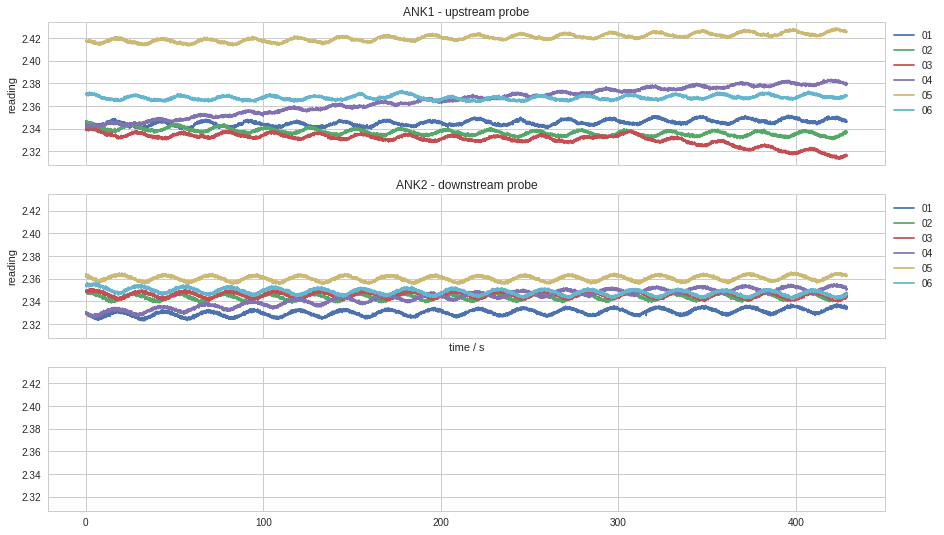

In [7]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ '01','02','03','04','05','06','07','08','09','10']

filepaths = ['../experiments/exp_20jul19/01_base2.mat',
             '../experiments/exp_20jul19/02_base3.mat',
             '../experiments/exp_20jul19/03_base4.mat',
             '../experiments/exp_20jul19/06_base5.mat',
             '../experiments/exp_20jul19/07_base6.mat',
             '../experiments/exp_20jul19/09_base7.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
 
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')

Text(0.5,0,'time / s')

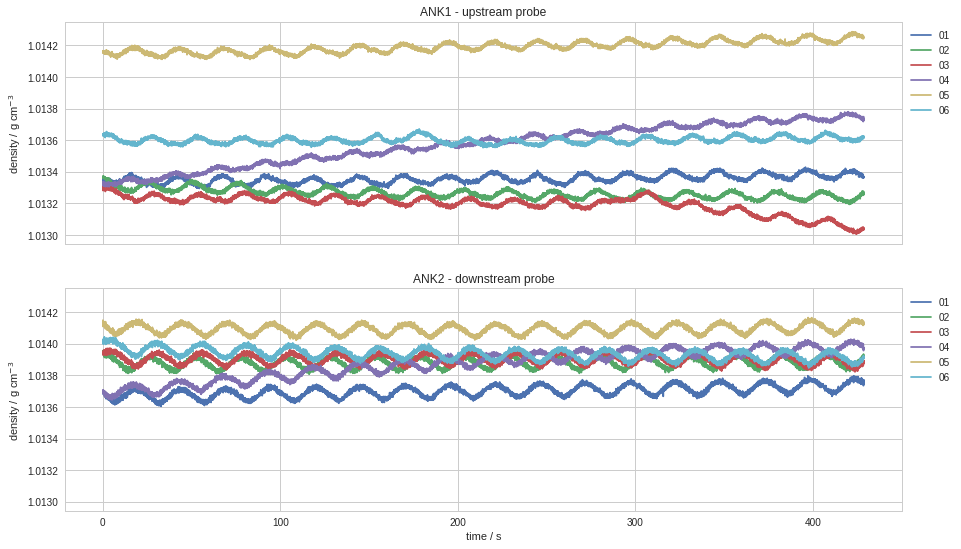

In [9]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ '01','02','03','04','05','06','07','08','09','10']

filepaths = ['../experiments/exp_20jul19/01_base2.mat',
             '../experiments/exp_20jul19/02_base3.mat',
             '../experiments/exp_20jul19/03_base4.mat',
             '../experiments/exp_20jul19/06_base5.mat',
             '../experiments/exp_20jul19/07_base6.mat',
             '../experiments/exp_20jul19/09_base7.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_06Jul19(P1), label=lab)
    ax1.plot(time,ctools.densANK2_06Jul19(P2), label=lab)
 
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')

### Profiles

(0, 45)

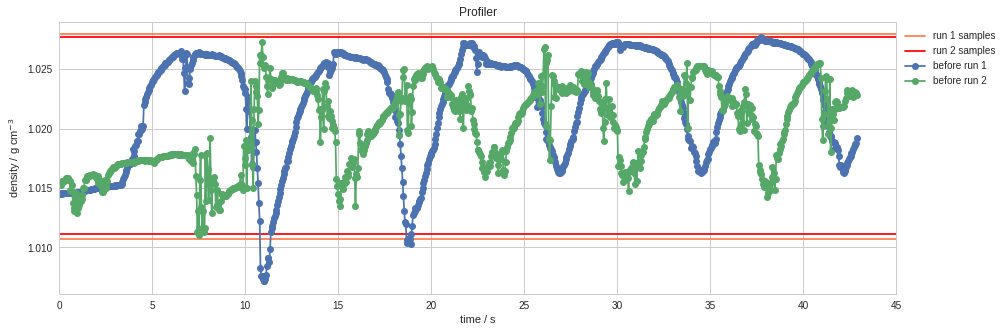

In [12]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
labels=['before run 1', 'before run 2']

ax0.axhline(1.01075,color='coral', label='run 1 samples')
ax0.axhline(1.02793,color='coral')
ax0.axhline(1.01113,color='red', label='run 2 samples')
ax0.axhline(1.02768,color='red')

filepaths = ['../experiments/exp_20jul19/04_profile1.mat',
             '../experiments/exp_20jul19/08_profile2.mat',
             ]
ind_offset = [0,0]
for filepath, lab, ind in zip(filepaths, labels, ind_offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = ctools.densP_06Jul19(P3)
    
    ax0.plot(time[ind:]-time[ind],densP3[ind:],'o-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')
ax0.set_xlim(0,45)

### Experiment

../experiments/exp_20jul19/05_experiment1.mat
../experiments/exp_20jul19/10_experiment2.mat


Text(0.5,0,'sample')

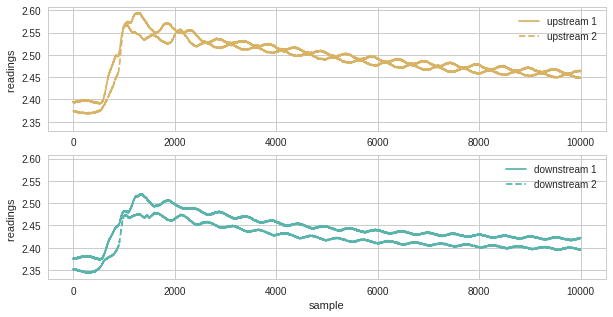

In [13]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_20jul19/05_experiment1.mat',
         '../experiments/exp_20jul19/10_experiment2.mat',
   ]
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../experiments/exp_20jul19/05_experiment1.mat
../experiments/exp_20jul19/10_experiment2.mat


Text(0.5,1,'Probe density')

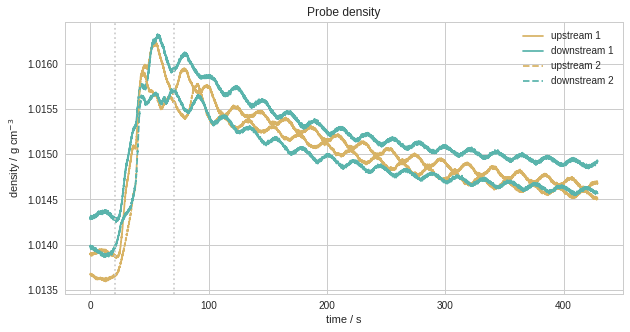

In [15]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_20jul19/05_experiment1.mat',
         '../experiments/exp_20jul19/10_experiment2.mat']

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_06Jul19(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_06Jul19(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../experiments/exp_20jul19/05_experiment1.mat
../experiments/exp_20jul19/10_experiment2.mat


Text(0.5,1,'Probe density minus initial density')

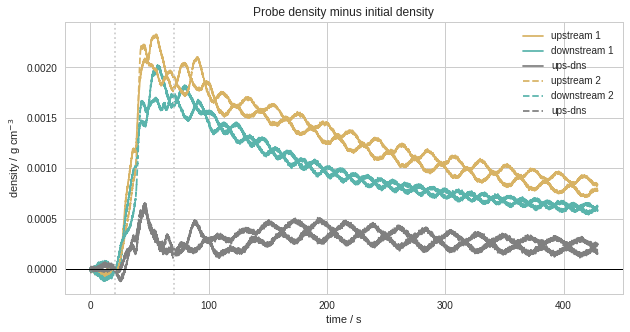

In [16]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_20jul19/05_experiment1.mat',
         '../experiments/exp_20jul19/10_experiment2.mat',
         ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty)
    ax0.plot(time,((ctools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0])-
                   (ctools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5')

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


../experiments/exp_20jul19/05_experiment1.mat
../experiments/exp_20jul19/10_experiment2.mat


Text(0.5,1,'Probe density minus initial density')

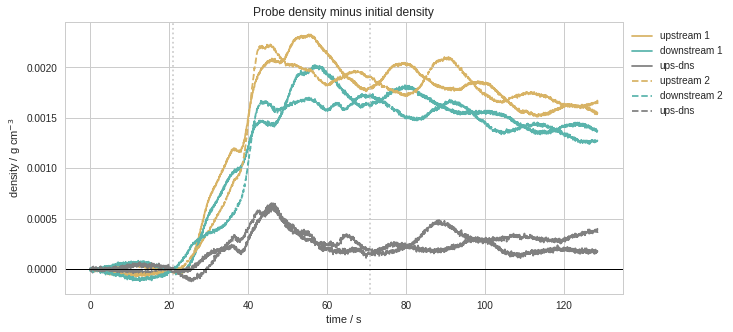

In [30]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_20jul19/05_experiment1.mat',
         '../experiments/exp_20jul19/10_experiment2.mat',
         ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'][:3000]
    P2 = mat['ch2'][:3000]
    time = mat['time'][:3000]
    ax0.plot(time,ctools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty)
    ax0.plot(time,((ctools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0])-
                   (ctools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5')

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


In [31]:
g=9.81
rho_0=998

# N above sb July 20
np.sqrt((g/rho_0)*(1018.385-1010.75)/0.03)

1.5816599813465546

In [32]:
# N above sb July 4
np.sqrt((g/rho_0)*(1016.639-1009.56) /0.03)

1.522981268396889

In [33]:
# N above sb July 13
np.sqrt((g/rho_0)*(1016.31-1010.43)/0.03) 

1.3880249372590194